<a href="https://colab.research.google.com/github/rajteer/Kwanciki/blob/main/Kwanty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dwuwymiarowa studnia potencjału

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import sympy as sp
import matplotlib.animation as animation
import matplotlib
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

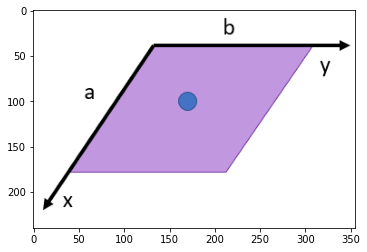

In [4]:
%matplotlib inline
pil_im = Image.open('particle.png', 'r')
imshow(np.asarray(pil_im))

Równanie Schrodingera w drugim wymiarze:
$$-\frac{\hbar^2}{2 M}\Big ( \frac{\partial ^2 \Psi}{\partial x^2}+\frac{\partial ^2 \Psi}{\partial y^2} \Big ) + V(x, y)\Psi(x, y)= E \Psi (x, y)$$
Ponieważ w obszarze $x \in [0, a] $ i $y \in [0, b]$ potencjał studni $V(x, y)=0$ otrzymujemy:
$$-\frac{\hbar^2}{2 M}\Big ( \frac{\partial ^2 \Psi}{\partial x^2}+\frac{\partial ^2 \Psi}{\partial y^2} \Big )= E \Psi (x, y)$$
W pozostałym obszarze $V(x, y)=\infty$


Separacja zmiennych. Wyrażamy funkcję dwuwymiarowa jako iloczyn dwóch funkcji jednowymiarowych. Zatem szukamy rozwiązania postaci:
$$\Psi(x, y)= X(x)Y(y)$$
$$-\frac{\hbar^2}{2 M}\Big ( \frac{\partial ^2 \Psi}{\partial x^2}\Big )= E_n X(x)$$
$$-\frac{\hbar^2}{2 M}\Big ( \frac{\partial ^2 \Psi}{\partial y^2}\Big )= E_m Y(y)$$
$$E=E_n+E_m$$


In [5]:
x = sp.Symbol('x')
y = sp.Symbol('y')
kx = sp.Symbol('k_x', real=True, positive=True)
a = sp.Symbol('a', real=True, positive=True)
b = sp.Symbol('b', real=True, positive=True)
ky = sp.Symbol('k_y', real=True, positive=True)
X= sp.Function('X')
Y= sp.Function('Y')
x, y, X, Y, kx, ky

(x, y, X, Y, k_x, k_y)

In [6]:
eq1 = sp.Eq(X(x).diff(x, x), -kx**2*X(x))
eq1

Eq(Derivative(X(x), (x, 2)), -k_x**2*X(x))

In [7]:
sol1=sp.dsolve(eq1, X(x))
sol1

Eq(X(x), C1*sin(k_x*x) + C2*cos(k_x*x))

In [8]:
eq2 = sp.Eq(Y(y).diff(y, y), -ky**2*Y(y))
eq2

Eq(Derivative(Y(y), (y, 2)), -k_y**2*Y(y))

In [9]:
sol2=sp.dsolve(eq2, Y(y))
sol2

Eq(Y(y), C1*sin(k_y*y) + C2*cos(k_y*y))

Wyznaczamy stałe całkowania za pomocą:
* warunków brzegowych
$$\Psi(0, y)= \Psi(a, y)=0$$
$$\Psi(x, 0)= \Psi(x, b)=0$$
Zatem $X(0)=X(a)=0$ oraz że $Y(0)=Y(b)=0$

In [10]:
s1= sol1.subs(x, 0)
s1

Eq(X(0), C2)

In [11]:
s2= sol2.subs(y, 0)
s2

Eq(Y(0), C2)

$$X(x)= C_1 sin(k_x x)$$
$$X(a)=C_1 sin(k_x a)=0 \hspace{1cm} C_1 \neq 0$$
$$k_x a=n \pi \hspace{0.5cm} \rightarrow \hspace{0.5cm} k_x=\frac{n\pi}{a} $$

$$Y(y)= C_1 sin(k_y y)$$
$$Y(b)=C_1 sin(k_y b)=0 \hspace{1cm} C_1 \neq 0$$
$$k_y b=m \pi \hspace{0.5cm} \rightarrow \hspace{0.5cm} k_y=\frac{m\pi}{b} $$

* normalizacja


Powyższe stałe całkowania zastępujęmy nową stałą A:
$$\Psi(x, y)= A \cdot sin(\frac{n\pi}{a} x)\,sin(\frac{m\pi}{b} y)$$
Wyznaczamy ją z warunku normalizacji
$$\int_0^a \int_0^b |\Psi(x, y)|^2 \, dx dy=1$$
$$N^2 \int_0^a sin^2(\frac{n\pi}{a} x) \,dx \int_0^b sin^2(\frac{m\pi}{b} y) \, dy=1$$

In [12]:
n = sp.Symbol('n', integer= True, positive= True) 
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', integer= True, positive= True) 
b = sp.Symbol('b', real=True)
n, m, a, b

(n, m, a, b)

In [13]:
f1=sp.sin(n*sp.pi*x/a)**2
f1

sin(pi*n*x/a)**2

In [14]:
sp.integrate(f1, (x, 0, a))

a/2

In [15]:
f2=sp.sin(m*sp.pi*x/b)**2
f2

sin(pi*m*x/b)**2

In [16]:
sp.integrate(f2, (x, 0, b))

b/2

$$N^2 \cdot \frac{a}{2} \cdot \frac{b}{2}=1$$
$$N=\frac{2}{\sqrt{ab}}$$
Zakładamy, że $a=b$ więc:
$$N=\frac{2}{a}$$

Zatem otrzymujemy:
$$\Psi_{n,m} (x, y)= \frac{2}{a}\,sin(\frac{n\pi}{a} x)\,sin(\frac{m\pi}{a} y)$$

**Wizualizacja stanów stacjonarnych**

In [17]:
def Psi(n, m, x, y, t, a = 1.0, h = 1.0, M = 1.0):
    R=np.real((2.0 / a) * np.sin(n * np.pi * x / a) *np.sin(m * np.pi * y / a)* np.exp(-1j * (n**2+m**2) * np.pi**2 * h / (2 * M * a**2) * t))
    return R

In [18]:
Nfrm = 300

In [19]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

xs = np.linspace(0, 1, 100)
ys = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xs, ys)
plt.close()
ax.set_zlim(-2, 2)
n=3
m=3

wframe = None
Z = Psi(n, m, X, Y, 0)
def update(idx):
    phi=phis[idx]
    global wframe
    if wframe:
        ax.collections.remove(wframe)
    Z = Psi(n, m, X, Y, phi)
    wframe = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="winter", linewidth=0.5)
    
phis = np.linspace(0, 1, 300)
ani = animation.FuncAnimation(fig, update, Nfrm, interval=50)
HTML(ani.to_html5_video())

**Drabinka energetyczna**

$$E_{n,m}=E_n +E_m$$
$$E_{n,m}=\frac{\hbar^2 \pi^2}{2 M a^2} (n^2+m^2)$$

In [20]:
def Energy(n,m, a = 1.0, h = 1.0, M = 1.0): 
    return (h**2*np.pi**2)/(2* M*a**2)*(n**2+m**2)

Text(0, 0.5, '$E_{n,m}$')

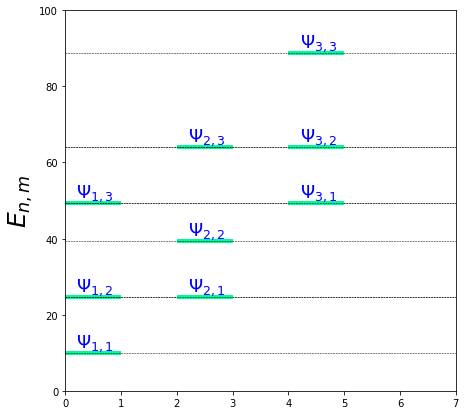

In [21]:
fig = plt.figure(figsize=(7,7))
plt.axis([0, 7, 0, 100])
for n in range(1,4):
    for m in range(1, 4):
        str1='$'+r'\Psi_{'+str(n)+r','+str(m)+r'}$'
        plt.text(n*2-1.8, Energy(n,m)+ 1.5, str1, fontsize=18, color="blue")
        plt.hlines(Energy(n,m), n*2-2, n*2-1, linewidth=4, color="mediumspringgreen")
        plt.hlines(Energy(n,m), 0.0, 7, linewidth=0.5, linestyle='--', color="black")
plt.ylabel('$E_{n,m}$', fontsize = 25)

# Gaussowska paczka falowa w dwóch wymiarach

$$\Psi(x, y, t)=\Psi(x,t) \cdot \Psi(y, t)$$
$$\Psi(x, t)= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} \tilde{\psi}(k_x) \cdot e^{i(k_x x- \frac{\hbar k_x^2}{2m}t)}$$
$$\Psi(x, 0)=A_x \cdot e^{-a x^2}$$
$$\Psi(y, t)= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} \tilde{\psi}(k_y) \cdot e^{i(k_y y- \frac{\hbar k_y^2}{2m}t)}$$
$$\Psi(y, 0)=A_y \cdot e^{-a y^2}$$

In [22]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
sp.init_printing()
import matplotlib.animation as animation
import matplotlib
from matplotlib.pyplot import imshow
from sympy.utilities.lambdify import lambdify, implemented_function
import numpy as np
from PIL import Image
from matplotlib import cm

In [23]:
x = sp.Symbol('x', real = True)
y = sp.Symbol('y', real = True)
Ax = sp.Symbol('A_x')
Ay = sp.Symbol('A_y')
kx = sp.Symbol('k_x', real = True)
ky = sp.Symbol('k_y', real = True)
a = sp.Symbol('a', real = True, positive = True)
t = sp.Symbol('t', real = True, positive = True)
h = sp.Symbol('hbar', real = True, positive = True)
M = sp.Symbol('M', real = True, positive = True)

In [24]:
Psi0_x = Ax* sp.exp(-a*x**2)
Psi0_x

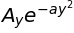

In [25]:
Psi0_y = Ay*sp.exp(-a*y**2)
Psi0_y

In [26]:
sp.integrate(Psi0_x*Psi0_x.conjugate(), (x, -sp.oo, sp.oo))

In [27]:
Psi0_x = Psi0_x.subs(Ax, 2*a/sp.pi**sp.Rational(1,4))
Psi0_x

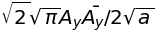

In [28]:
sp.integrate(Psi0_y*Psi0_y.conjugate(), (y, -sp.oo, sp.oo))

In [29]:
Psi0_y = Psi0_y.subs(Ay, 2*a/sp.pi**sp.Rational(1,4))
Psi0_y

$$\tilde{\psi}(k_x)=(u_{k_x}(x), \Psi(x, 0))$$
$$\tilde{\psi}(k_y)=(u_{k_y}(y), \Psi(y, 0))$$

In [30]:
uk_x = 1/sp.sqrt(2*sp.pi)*sp.exp(sp.I*kx*x)
uk_x

In [31]:
uk_y = 1/sp.sqrt(2*sp.pi)*sp.exp(sp.I*ky*y)
uk_y

In [32]:
Psik_x = sp.integrate(uk_x.conjugate()*Psi0_x, (x, -sp.oo, sp.oo)).simplify()
Psik_x

In [33]:
Psik_y = sp.integrate(uk_y.conjugate()*Psi0_y, (y, -sp.oo, sp.oo)).simplify()
Psik_y

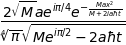

In [34]:
Psixt = sp.integrate(Psik_x * uk_x*sp.exp(-sp.I*h*kx**2*t/(2*M)), (kx, -sp.oo, sp.oo), conds= 'none').simplify()
Psixt

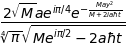

In [35]:
Psiyt = sp.integrate(Psik_y * uk_y*sp.exp(-sp.I*h*ky**2*t/(2*M)), (ky, -sp.oo, sp.oo), conds= 'none').simplify()
Psiyt

In [36]:
Psi_xyt = lambdify((x, y, t), ((sp.Abs(Psixt)**2).subs({h:1, M:1, a:1}))*((sp.Abs(Psiyt)**2).subs({h:1, M:1, a:1})), modules= ['numpy', {'exp_polar':np.exp}])

In [37]:
Nfrm = 300

In [38]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

# Make the X, Y meshgrid.
xs = np.linspace(-5, 5, 100)
ys = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(xs, ys)
plt.close()
# Set the z axis limits so they aren't recalculated each frame.
ax.set_zlim(0, 5)

# Begin plotting.
wframe = None
Z = Psi_xyt(0, 0, 0)
def update(idx):
    phi=phis[idx]
    global wframe
    # If a line collection is already remove it before drawing.
    if wframe:
        ax.collections.remove(wframe)
    # Plot the new wireframe and pause briefly before continuing.
    Z = Psi_xyt(X, Y, phi)
    wframe = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=1)
    
phis = np.linspace(0, 2, 300)
ani = animation.FuncAnimation(fig, update, Nfrm, interval=50)
HTML(ani.to_html5_video())

$$\Psi(x, y, t)=\Psi(x,t) \cdot \Psi(y, t)$$
$$\Psi(x, t)= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} \tilde{\psi}(k_x) \cdot e^{i(k_x x- \frac{\hbar k_x^2}{2m}t)}$$
$$\Psi(x, 0)=A_x \cdot e^{-a x^2}e^{i k_0 x}$$
$$\Psi(y, t)= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} \tilde{\psi}(k_y) \cdot e^{i(k_y y- \frac{\hbar k_y^2}{2m}t)}$$
$$\Psi(y, 0)=A_y \cdot e^{-a y^2}e^{i k_0 y}$$

In [41]:
Psi0_x = Ax* sp.exp(-a*x**2)*sp.exp(3*sp.I*x)
Psi0_x

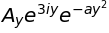

In [42]:
Psi0_y = Ay*sp.exp(-a*y**2)*sp.exp(3*sp.I*y)
Psi0_y

In [43]:
sp.integrate(Psi0_x*Psi0_x.conjugate(), (x, -sp.oo, sp.oo))

In [44]:
Psi0_x = Psi0_x.subs(Ax, 2*a/sp.pi**sp.Rational(1,4))
Psi0_x

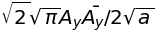

In [45]:
sp.integrate(Psi0_y*Psi0_y.conjugate(), (y, -sp.oo, sp.oo))

In [46]:
Psi0_y = Psi0_y.subs(Ay, 2*a/sp.pi**sp.Rational(1,4))
Psi0_y

In [47]:
uk_x = 1/sp.sqrt(2*sp.pi)*sp.exp(sp.I*kx*x)
uk_x

In [48]:
uk_y = 1/sp.sqrt(2*sp.pi)*sp.exp(sp.I*ky*y)
uk_y

In [49]:
Psik_x = sp.integrate(uk_x.conjugate()*Psi0_x, (x, -sp.oo, sp.oo)).simplify()
Psik_x

In [50]:
Psik_y = sp.integrate(uk_y.conjugate()*Psi0_y, (y, -sp.oo, sp.oo)).simplify()
Psik_y

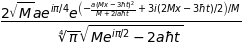

In [51]:
Psixt = sp.integrate(Psik_x * uk_x*sp.exp(-sp.I*h*kx**2*t/(2*M)), (kx, -sp.oo, sp.oo), conds= 'none').simplify()
Psixt

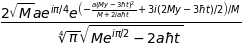

In [52]:
Psiyt = sp.integrate(Psik_y * uk_y*sp.exp(-sp.I*h*ky**2*t/(2*M)), (ky, -sp.oo, sp.oo), conds='none').simplify()
Psiyt

In [53]:
Psi_xyt = lambdify((x, y, t), ((sp.Abs(Psixt)**2).subs({h:1, M:1, a:1}))*((sp.Abs(Psiyt)**2).subs({h:1, M:1, a:1})), modules= ['numpy', {'exp_polar':np.exp}])

In [54]:
Nfrm = 300

In [55]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

# Make the X, Y meshgrid.
xs = np.linspace(-10, 10, 100)
ys = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(xs, ys)
plt.close()
# Set the z axis limits so they aren't recalculated each frame.
ax.set_zlim(0, 5)
# Begin plotting.
wframe = None
Z = Psi_xyt(0, 0, 0)
def update(idx):
    phi=phis[idx]
    global wframe
    # If a line collection is already remove it before drawing.
    if wframe:
        ax.collections.remove(wframe)
    # Plot the new wireframe and pause briefly before continuing.
    Z = Psi_xyt(X, Y, phi)
    wframe = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=1)
    
phis = np.linspace(0, 2, 300)
ani = animation.FuncAnimation(fig, update, Nfrm, interval=50)
HTML(ani.to_html5_video())